In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing  import StandardScaler
from sklearn.preprocessing  import MinMaxScaler

In [3]:
df = pd.read_csv("C:/Users/lenovo/Downloads/archive/mtn_customer_churn.csv")

In [4]:
df.head(5)

,Customer ID,Full Name,Date of Purchase,Age,State,MTN Device,Gender,Satisfaction Rate,Customer Review,Customer Tenure in months,Subscription Plan,Unit Price,Number of Times Purchased,Total Revenue,Data Usage,Customer Churn Status,Reasons for Churn
0,CUST0001,Ngozi Berry,Jan-25,27,Kwara,4G Router,Male,2,Fair,2,165GB Monthly Plan,35000,19,665000,44.48,Yes,Relocation
1,CUST0002,Zainab Baker,Mar-25,16,Abuja (FCT),Mobile SIM Card,Female,2,Fair,22,12.5GB Monthly Plan,5500,12,66000,19.79,Yes,Better Offers from Competitors
2,CUST0003,Saidu Evans,Mar-25,21,Sokoto,5G Broadband Router,Male,1,Poor,60,150GB FUP Monthly Unlimited,20000,8,160000,9.64,No,NaN
3,CUST0003,Saidu Evans,Mar-25,21,Sokoto,Mobile SIM Card,Male,1,Poor,60,1GB+1.5mins Daily Plan,500,8,4000,197.05,No,NaN
4,CUST0003,Saidu Evans,Mar-25,21,Sokoto,Broadband MiFi,Male,1,Poor,60,30GB Monthly Broadband Plan,9000,15,135000,76.34,No,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer ID                974 non-null    object 
 1   Full Name                  974 non-null    object 
 2   Date of Purchase           974 non-null    object 
 3   Age                        974 non-null    int64  
 4   State                      974 non-null    object 
 5   MTN Device                 974 non-null    object 
 6   Gender                     974 non-null    object 
 7   Satisfaction Rate          974 non-null    int64  
 8   Customer Review            974 non-null    object 
 9   Customer Tenure in months  974 non-null    int64  
 10  Subscription Plan          974 non-null    object 
 11  Unit Price                 974 non-null    int64  
 12  Number of Times Purchased  974 non-null    int64  
 13  Total Revenue              974 non-null    int64  

In [6]:
df.columns.unique()

Index(['Customer ID', 'Full Name', 'Date of Purchase', 'Age', 'State',
       'MTN Device', 'Gender', 'Satisfaction Rate', 'Customer Review',
       'Customer Tenure in months', 'Subscription Plan', 'Unit Price',
       'Number of Times Purchased', 'Total Revenue', 'Data Usage',
       'Customer Churn Status', 'Reasons for Churn'],
      dtype='object')

In [7]:
df['Customer Churn Status'].value_counts()

Customer Churn Status
No     690
Yes    284
Name: count, dtype: int64

In [8]:
df.describe()

,Age,Satisfaction Rate,Customer Tenure in months,Unit Price,Number of Times Purchased,Total Revenue,Data Usage
count,974.000000,974.000000,974.000000,974.000000,974.000000,9.740000e+02,974.000000
mean,48.043121,2.947639,31.422998,19196.663244,10.564682,2.046696e+05,99.304764
std,17.764307,1.384219,17.191256,25586.726985,5.709427,3.247855e+05,57.739511
min,16.000000,1.000000,1.000000,350.000000,1.000000,3.500000e+02,0.820000
25%,32.000000,2.000000,17.000000,5500.000000,5.000000,3.300000e+04,47.637500
50%,49.000000,3.000000,31.000000,14500.000000,11.000000,1.080000e+05,103.330000
75%,63.750000,4.000000,47.000000,24000.000000,15.000000,2.610000e+05,149.697500
max,80.000000,5.000000,60.000000,150000.000000,20.000000,3.000000e+06,200.000000


75% of the customers have a satisfaction rate of 4 stars. Less than 25% of the customers have satisfaction rate of 5 stars.

Average tenure in months is 31 months. less than 25% of customers have tenure more than 47 months

Average revenue is 204,650 Naira. 

In [10]:
df['Customer Churn Status'].value_counts()

Customer Churn Status
No     690
Yes    284
Name: count, dtype: int64

In [11]:
df['Customer Churn Status'].value_counts()/len(df)*100

Customer Churn Status
No     70.841889
Yes    29.158111
Name: count, dtype: float64

Text(0.5, 1, 'Count of Customer Churn Status')

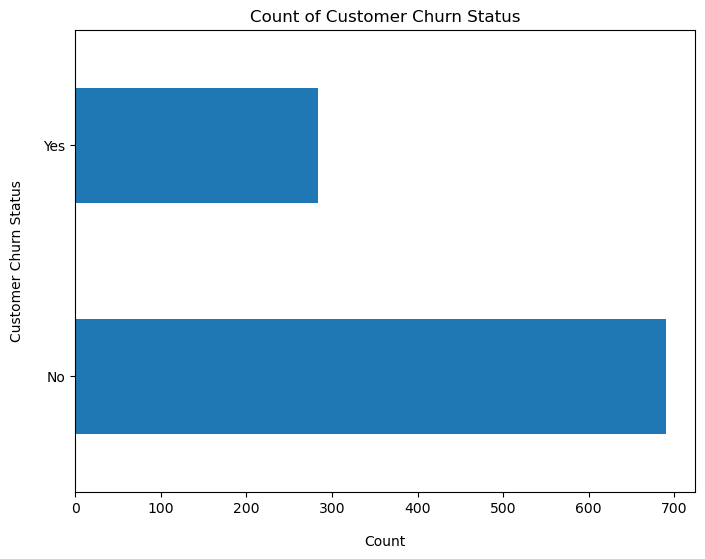

In [12]:
df['Customer Churn Status'].value_counts().plot(kind='barh', figsize=(8,6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Customer Churn Status", labelpad=14)
plt.title("Count of Customer Churn Status", y=1)

The data is highly imbalanced 

About 1/4 of customers are churning

## Data Cleaning

1. Check for missing values

In [16]:
df.isna().sum()

Customer ID                    0
Full Name                      0
Date of Purchase               0
Age                            0
State                          0
MTN Device                     0
Gender                         0
Satisfaction Rate              0
Customer Review                0
Customer Tenure in months      0
Subscription Plan              0
Unit Price                     0
Number of Times Purchased      0
Total Revenue                  0
Data Usage                     0
Customer Churn Status          0
Reasons for Churn            690
dtype: int64

2. Missing values Treatment

Reasons for churn has 690 missing values. 

However these missing values are important and should be ignored as those customers did not churn so i filled in nott applicable in those blank spaces instead

In [19]:
# Ignore NaN in Reasons for Churn for customers who did not churn
df['Reasons for Churn'] = df['Reasons for Churn'].fillna(
    df['Customer Churn Status'].map({'No': 'Not Applicable', 'Yes': None})
)

In [20]:
df.isna().sum()

Customer ID                  0
Full Name                    0
Date of Purchase             0
Age                          0
State                        0
MTN Device                   0
Gender                       0
Satisfaction Rate            0
Customer Review              0
Customer Tenure in months    0
Subscription Plan            0
Unit Price                   0
Number of Times Purchased    0
Total Revenue                0
Data Usage                   0
Customer Churn Status        0
Reasons for Churn            0
dtype: int64

3. Divide customers into bins based on age

In [22]:
#Get the max age

print(df['Age'].max()) 

80


In [23]:
labels =['{0} - {1}'.format(i, i+9) for i in range(1, 80, 10)]

print(labels)

['1 - 10', '11 - 20', '21 - 30', '31 - 40', '41 - 50', '51 - 60', '61 - 70', '71 - 80']


In [24]:
df['age_group'] = pd.cut(df.Age, range(1, 90, 10), right=False, labels=labels)

df['age_group'].value_counts()

age_group
41 - 50    167
31 - 40    166
61 - 70    164
21 - 30    157
51 - 60    152
71 - 80    122
11 - 20     46
1 - 10       0
Name: count, dtype: int64

4. Divide customers into bins based on Customer Tenure in months

In [26]:
# Get the max number of the tenure

print(df['Customer Tenure in months'].max())

60


In [27]:
labels =['{0} - {1}'.format(i, i+9) for i in range(1, 60, 10)]

print(labels)

['1 - 10', '11 - 20', '21 - 30', '31 - 40', '41 - 50', '51 - 60']


In [28]:
df['tenure_group'] = pd.cut(df['Customer Tenure in months'], range(1, 70, 10), right=False, labels=labels)

df['tenure_group'].value_counts()

tenure_group
21 - 30    181
51 - 60    176
41 - 50    172
11 - 20    156
31 - 40    146
1 - 10     143
Name: count, dtype: int64

5. Convert churn Status to binary

In [30]:
df['Customer Churn Status'] = df['Customer Churn Status'].map({'Yes': 1, 'No': 0})

In [31]:
df.head()

,Customer ID,Full Name,Date of Purchase,Age,State,MTN Device,Gender,Satisfaction Rate,Customer Review,Customer Tenure in months,Subscription Plan,Unit Price,Number of Times Purchased,Total Revenue,Data Usage,Customer Churn Status,Reasons for Churn,age_group,tenure_group
0,CUST0001,Ngozi Berry,Jan-25,27,Kwara,4G Router,Male,2,Fair,2,165GB Monthly Plan,35000,19,665000,44.48,1,Relocation,21 - 30,1 - 10
1,CUST0002,Zainab Baker,Mar-25,16,Abuja (FCT),Mobile SIM Card,Female,2,Fair,22,12.5GB Monthly Plan,5500,12,66000,19.79,1,Better Offers from Competitors,11 - 20,21 - 30
2,CUST0003,Saidu Evans,Mar-25,21,Sokoto,5G Broadband Router,Male,1,Poor,60,150GB FUP Monthly Unlimited,20000,8,160000,9.64,0,Not Applicable,21 - 30,51 - 60
3,CUST0003,Saidu Evans,Mar-25,21,Sokoto,Mobile SIM Card,Male,1,Poor,60,1GB+1.5mins Daily Plan,500,8,4000,197.05,0,Not Applicable,21 - 30,51 - 60
4,CUST0003,Saidu Evans,Mar-25,21,Sokoto,Broadband MiFi,Male,1,Poor,60,30GB Monthly Broadband Plan,9000,15,135000,76.34,0,Not Applicable,21 - 30,51 - 60


6. Encode Subscription Plan types

In [33]:
df['Subscription Plan'].unique()

array(['165GB Monthly Plan', '12.5GB Monthly Plan',
       '150GB FUP Monthly Unlimited', '1GB+1.5mins Daily Plan',
       '30GB Monthly Broadband Plan', '10GB+10mins Monthly Plan',
       '25GB Monthly Plan', '7GB Monthly Plan',
       '1.5TB Yearly Broadband Plan', '65GB Monthly Plan',
       '120GB Monthly Broadband Plan', '300GB FUP Monthly Unlimited',
       '60GB Monthly Broadband Plan', '500MB Daily Plan',
       '3.2GB 2-Day Plan', '20GB Monthly Plan', '2.5GB 2-Day Plan',
       '450GB 3-Month Broadband Plan', '200GB Monthly Broadband Plan',
       '1.5GB 2-Day Plan', '16.5GB+10mins Monthly Plan'], dtype=object)

In [34]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['Plan_Encoded'] = le.fit_transform(df['Subscription Plan'])

In [35]:
df.head()

,Customer ID,Full Name,Date of Purchase,Age,State,MTN Device,Gender,Satisfaction Rate,Customer Review,Customer Tenure in months,Subscription Plan,Unit Price,Number of Times Purchased,Total Revenue,Data Usage,Customer Churn Status,Reasons for Churn,age_group,tenure_group,Plan_Encoded
0,CUST0001,Ngozi Berry,Jan-25,27,Kwara,4G Router,Male,2,Fair,2,165GB Monthly Plan,35000,19,665000,44.48,1,Relocation,21 - 30,1 - 10,7
1,CUST0002,Zainab Baker,Mar-25,16,Abuja (FCT),Mobile SIM Card,Female,2,Fair,22,12.5GB Monthly Plan,5500,12,66000,19.79,1,Better Offers from Competitors,11 - 20,21 - 30,3
2,CUST0003,Saidu Evans,Mar-25,21,Sokoto,5G Broadband Router,Male,1,Poor,60,150GB FUP Monthly Unlimited,20000,8,160000,9.64,0,Not Applicable,21 - 30,51 - 60,5
3,CUST0003,Saidu Evans,Mar-25,21,Sokoto,Mobile SIM Card,Male,1,Poor,60,1GB+1.5mins Daily Plan,500,8,4000,197.05,0,Not Applicable,21 - 30,51 - 60,8
4,CUST0003,Saidu Evans,Mar-25,21,Sokoto,Broadband MiFi,Male,1,Poor,60,30GB Monthly Broadband Plan,9000,15,135000,76.34,0,Not Applicable,21 - 30,51 - 60,15


## Univariate Analysis

1 Histograms for

In [38]:
df.columns.unique()

Index(['Customer ID', 'Full Name', 'Date of Purchase', 'Age', 'State',
       'MTN Device', 'Gender', 'Satisfaction Rate', 'Customer Review',
       'Customer Tenure in months', 'Subscription Plan', 'Unit Price',
       'Number of Times Purchased', 'Total Revenue', 'Data Usage',
       'Customer Churn Status', 'Reasons for Churn', 'age_group',
       'tenure_group', 'Plan_Encoded'],
      dtype='object')

In [39]:
num_cols = ['Satisfaction Rate',
            'Unit Price', 'Number of Times Purchased',
            'Total Revenue', 'Data Usage']

df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Satisfaction Rate,974.0,2.947639,1.384219,1.00,2.0000,3.00,4.0000,5.0
Unit Price,974.0,19196.663244,25586.726985,350.00,5500.0000,14500.00,24000.0000,150000.0
Number of Times Purchased,974.0,10.564682,5.709427,1.00,5.0000,11.00,15.0000,20.0
Total Revenue,974.0,204669.609856,324785.499316,350.00,33000.0000,108000.00,261000.0000,3000000.0
Data Usage,974.0,99.304764,57.739511,0.82,47.6375,103.33,149.6975,200.0


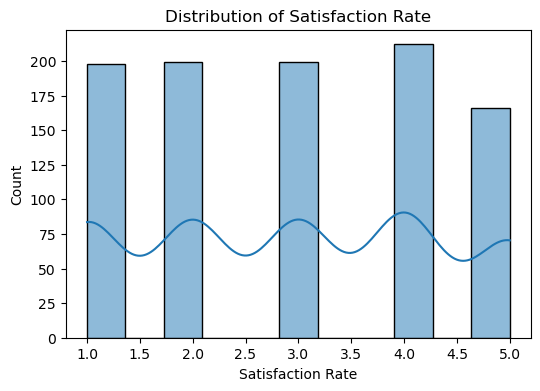

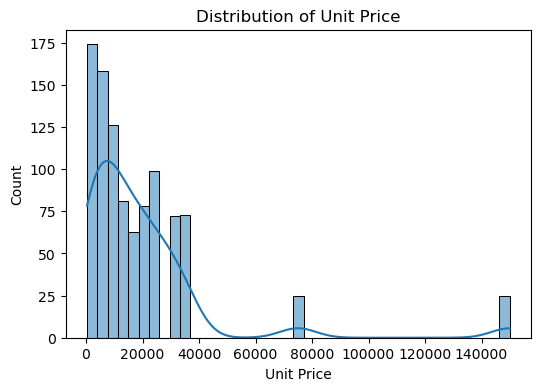

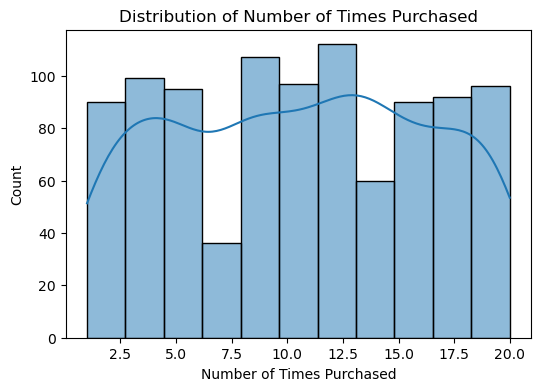

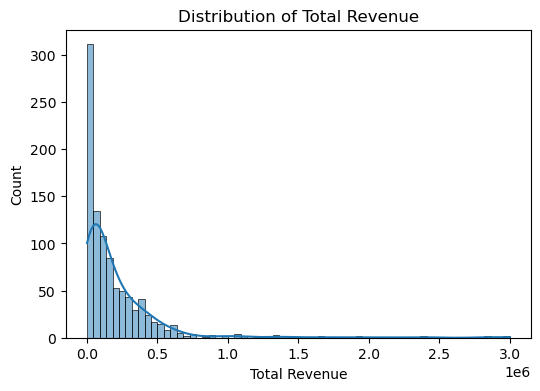

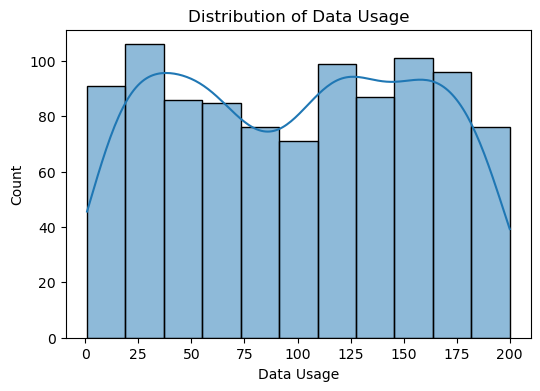

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

The age_group distribution shows the frequency of customers across different age ranges.
From the histogram, we can see:
* The most common age group is 41-50.
* this distribution is fairly uniformed.
* there are few older customers(71-80)
* This helps us understand the demographic profile of the customers

The satisfaction rate distribution 

The distribution of Unit Price is highly right-skewed. 
Most of the values fall between 0 and 40,000, indicating that the majority of products are low-priced.
A few very high prices create a long right tail, suggesting the presence of premium or high-value items that are purchased far less frequently. 
Because of this skewness, the median provides a better measure of central tendency than the mean.

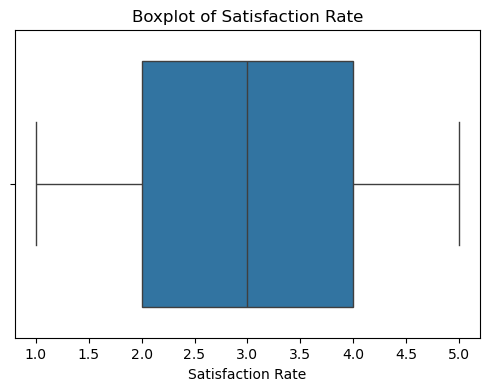

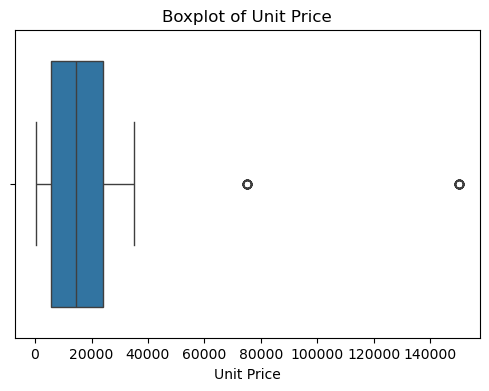

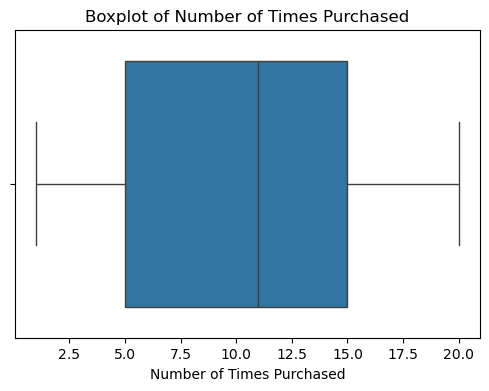

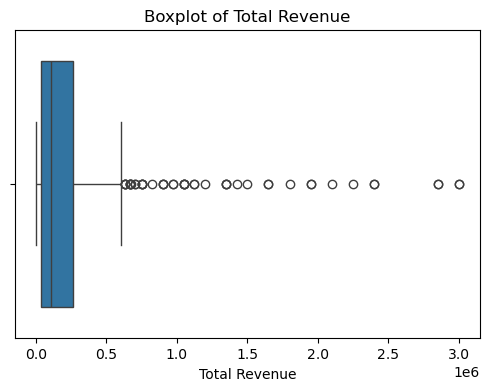

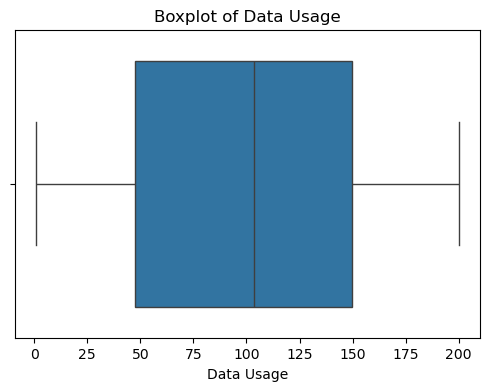

In [43]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [79]:
cat_cols = ['State', 'MTN Device', 'Gender', 'Customer Review',
            'Subscription Plan', 'Customer Churn Status',
            'Reasons for Churn', 'age_group', 'tenure_group']



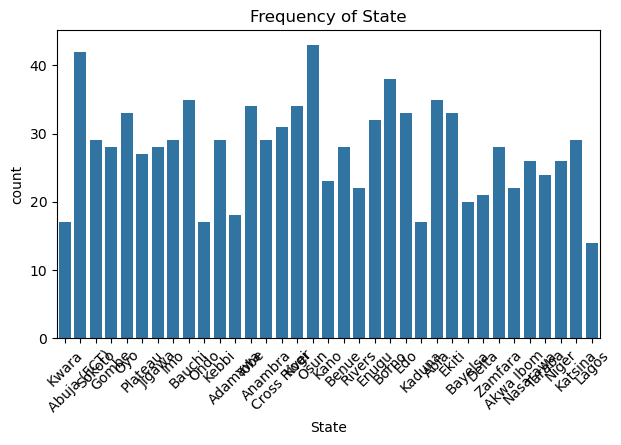

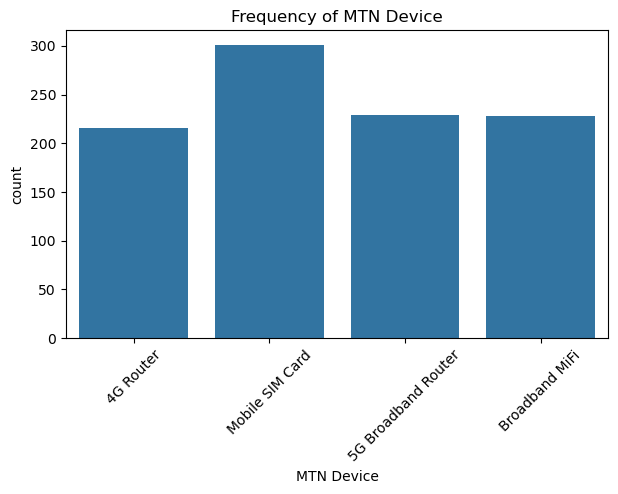

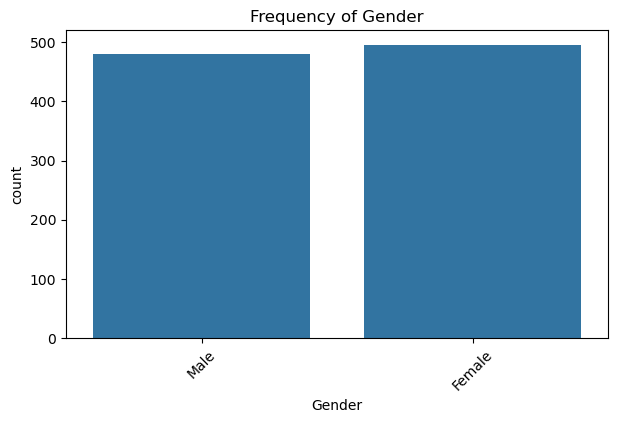

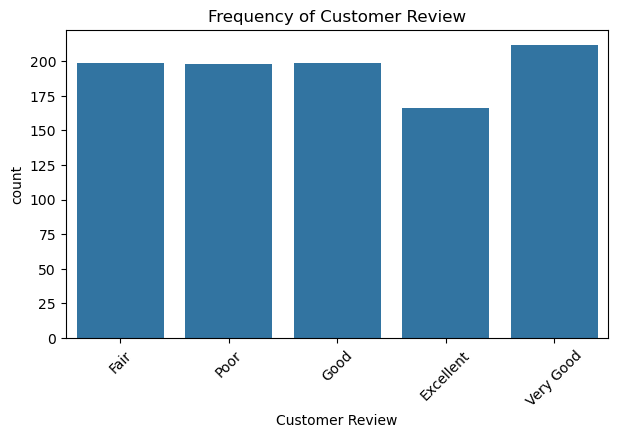

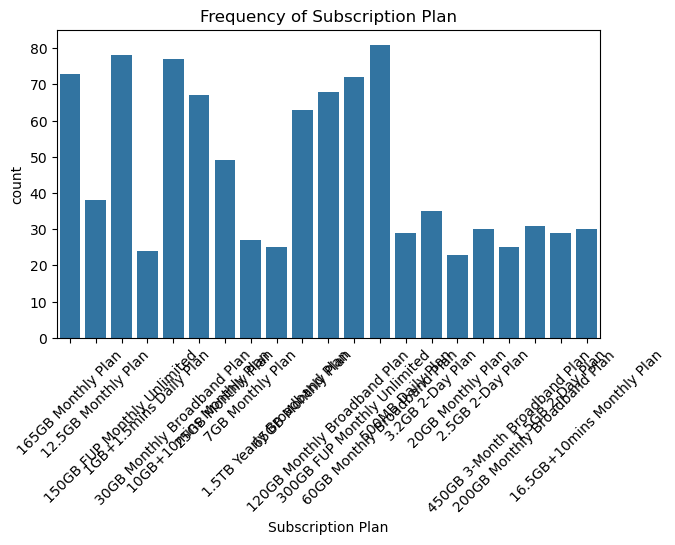

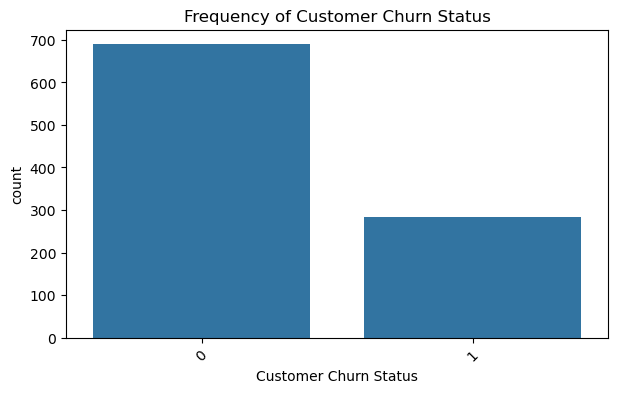

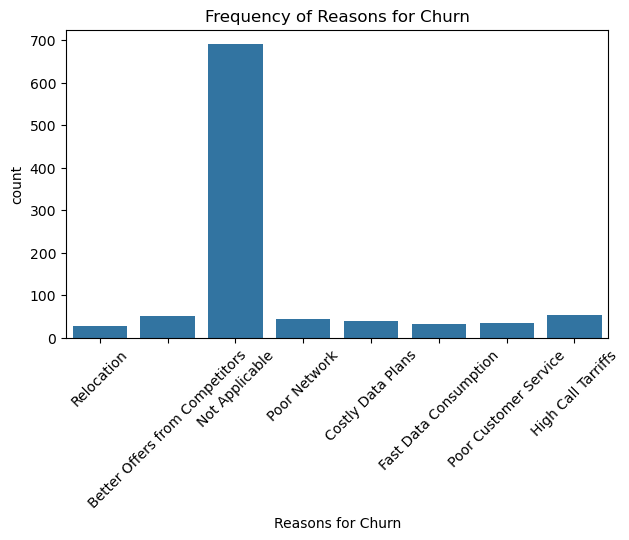

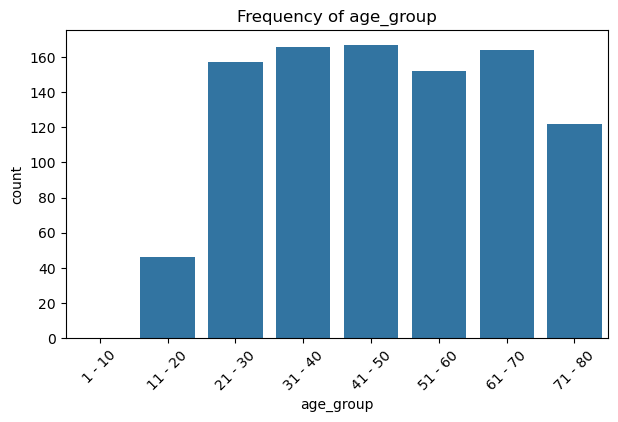

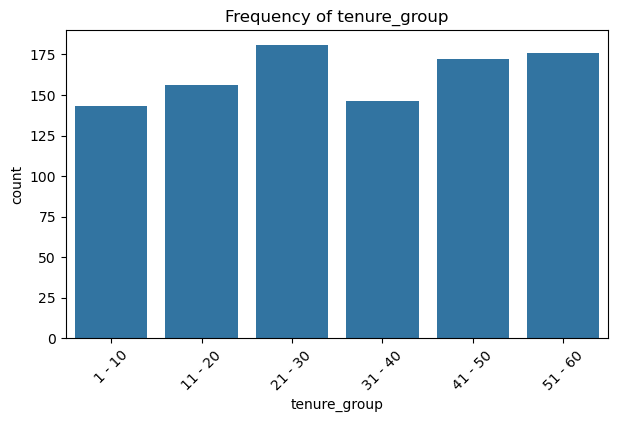

In [45]:
for col in cat_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(f'Frequency of {col}')
    plt.show()